In [1]:
import ccxt
import pandas as pd
import pandas_ta as ta
import matplotlib.pyplot as plt
import numpy as np
exchange = ccxt.binanceusdm()
limits = 300
bars = exchange.fetch_ohlcv('BTCUSDT',timeframe="1d", limit=limits)
ccxt_df = pd.DataFrame(bars, columns=['time', 'open', 'high', 'low', 'close', 'volume'])

In [2]:
#ADX using pandas_ta (THIS IS 100 TIMES EASIER)
#adx = ta.adx(['high'], ccxt_df['low'], ccxt_df['close'], length=14, lensig=14, mamode='rma')
ccxt_df['ADX'] = ccxt_df.ta.adx(length=14,lensig=14, mamode='rma')['ADX_14']

In [3]:
#EMA's 12 and 21 stored within the ccxt_df dataframe
ccxt_df['EMA12'] = ccxt_df.ta.ema(length=12)
ccxt_df['EMA21'] = ccxt_df.ta.ema(length=21)

In [4]:
#Aroon with the upper and lower lines stored within the ccxt dataframe
ccxt_df['AroonU'] = ccxt_df.ta.aroon(length=14)['AROONU_14']
ccxt_df['AroonD'] = ccxt_df.ta.aroon(length=14)['AROOND_14']

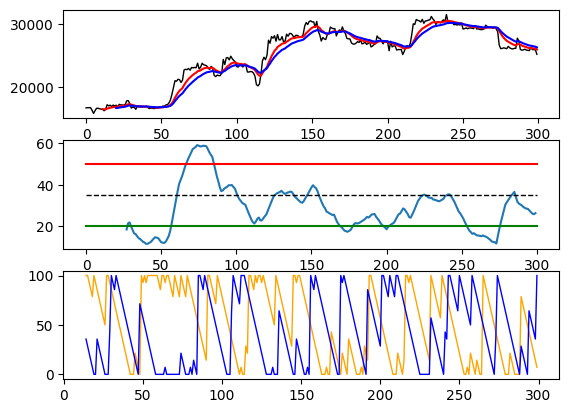

In [5]:
# Displays ADX on a graph 
fig , axis = plt.subplots(3,1)
axis[0].plot(ccxt_df['close'], linewidth="1", color='black')
axis[0].plot(ccxt_df['EMA12'], label = 'EMA 12', color='red')
axis[0].plot(ccxt_df['EMA21'], label = 'EMA 21', color='blue')  
axis[1].plot(ccxt_df['ADX'], label = 'ADX', linewidth="1.5")
axis[2].plot(ccxt_df['AroonU'], label='Upper', color='orange', linewidth='1')
axis[2].plot(ccxt_df['AroonD'], label='Lower', color='blue', linewidth='1')

min_valuex = [0,limits]
min_valuey = [20,20]
axis[1].plot(min_valuex,min_valuey, color="green", linewidth="1.5")

max_valuex = [0,limits]
max_valuey = [50,50]
axis[1].plot(max_valuex,max_valuey, color="red", linewidth="1.5")

mid_valuex = [0,limits]
mid_valuey = [35,35]
axis[1].plot(mid_valuex,mid_valuey, linestyle="--", linewidth="1", color="black")
#plt.legend()
plt.show()

In [6]:
#add signals on chart
#Implementation of EMAs are from here
# ccxt_df['Trend_Reversal'] = 0.0  
# ccxt_df['Trend_Reversal'] = np.where((ccxt_df['EMA12'] > ccxt_df['EMA21']) |
#                                          (ccxt_df['AroonU'] >= ccxt_df['AroonD']) , 1.0, 0.0) #if 12EMA > 21EMA it's bullish and signal will be set to 1

ccxt_df['Trend_buys'] = np.where((ccxt_df['EMA12'] > ccxt_df['EMA21']) & (ccxt_df['AroonU'] >= ccxt_df['AroonD']) , 1.0, 0.0) # buy signals and closes

ccxt_df['Trend_sells'] = np.where((ccxt_df['EMA12'] < ccxt_df['EMA21']) & (ccxt_df['AroonU'] < ccxt_df['AroonD']) , 1.0, 0.0) # sell signals and closes

# create a new column 'trend signal buys' which is a day-to-day difference of the 'trend reversal buys' column. 
ccxt_df['Trend_Signal_buys'] = ccxt_df['Trend_buys'].diff()

# create a new column 'trend signal sells' which is a day-to-day difference of the 'trend reversal sells' column.
ccxt_df['Trend_Signal_sells'] = ccxt_df['Trend_sells'].diff()

In [7]:
# Wait after loss
# In order to wait for a set number of bars after a loss I need to first be able to identify a loss

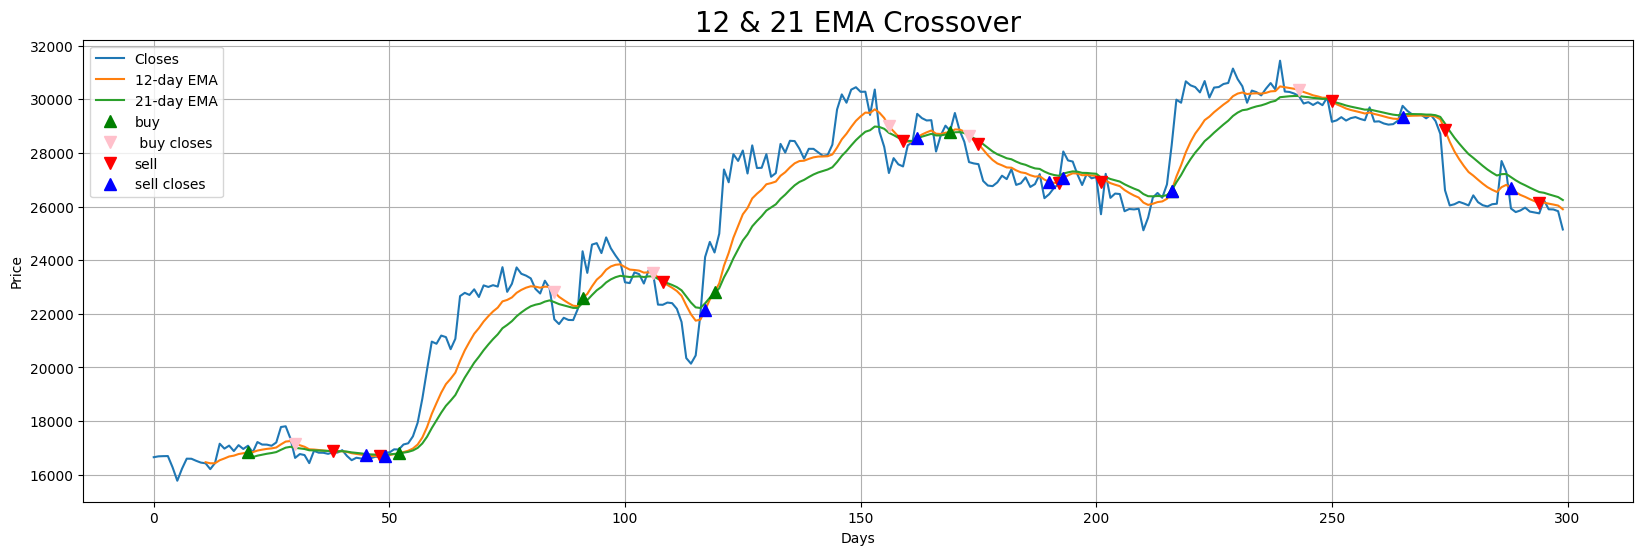

In [8]:
plt.figure(figsize=(20,6))
plt.tick_params(axis = 'both', labelsize = 10)
# plot close price, short-term and long-term moving averages 
ccxt_df['close'].plot(label = 'Closes')  
ccxt_df['EMA12'].plot(label = '12-day EMA') 
ccxt_df['EMA21'].plot(label = '21-day EMA') 

# plot 'buy' signals
plt.plot(ccxt_df[ccxt_df['Trend_Signal_buys'] == 1].index, ccxt_df['EMA12'][ccxt_df['Trend_Signal_buys'] == 1], '^', markersize = 8, color = 'g', label = 'buy') # buy signals

# # plot 'buy close' signals
plt.plot(ccxt_df[ccxt_df['Trend_Signal_buys'] == -1].index, ccxt_df['EMA12'][ccxt_df['Trend_Signal_buys'] == -1], 'v', markersize = 8, color = 'pink', label = ' buy closes')


# plot 'sell' signals
plt.plot(ccxt_df[ccxt_df['Trend_Signal_sells'] == 1].index, ccxt_df['EMA12'][ccxt_df['Trend_Signal_sells'] == 1], 'v', markersize = 8, color = 'r', label = 'sell') # buy signals

# # plot 'sell close' signals
plt.plot(ccxt_df[ccxt_df['Trend_Signal_sells'] == -1].index, ccxt_df['EMA12'][ccxt_df['Trend_Signal_sells'] == -1], '^', markersize = 8, color = 'blue', label = 'sell closes')

plt.xlabel("Days")
plt.ylabel("Price")
plt.title('12 & 21 EMA Crossover', fontsize = 20)
plt.legend()
plt.grid()
plt.show()

In [9]:
# #Makes chart look better
# import mplfinance as mpf

# data = ccxt_df[['time', 'open', 'high', 'low', 'close', 'volume']]
# data['Date'] = pd.to_datetime(data['time'])
# data.set_index('Date', inplace=True)
# plt.figure(figsize=(20,6))
# mpf.plot(data, type='candle', volume=False)

# # # plot 'sell' signals
# # mpf.plot(ccxt_df[ccxt_df['Trend_Signal_sells'] == 1].index, ccxt_df['EMA12'][ccxt_df['Trend_Signal_sells'] == 1], 'v', markersize = 8, color = 'r', label = 'sell') # buy signals

# # # # plot 'sell close' signals
# # mpf.plot(ccxt_df[ccxt_df['Trend_Signal_sells'] == -1].index, ccxt_df['EMA12'][ccxt_df['Trend_Signal_sells'] == -1], '^', markersize = 8, color = 'blue', label = 'sell closes')
# plt.show()

In [10]:
# #get latest data
# import time
# time_interval = "10 second"

# try:
#     while True:
#         print("check latest data")
#         time.sleep(10) #time sleep in seconds
        

# except KeyboardInterrupt:
#     print("Keyboard interrupt")